# Метод k ближайших соседей (k-NN, k Nearest Neighbors) 

План:
1. Классификация и регрессия
2. Метод k ближайших соседей для классификации
3. Метод k ближайших соседей для регрессии
4. Выводы

# 1. Классификация и регрессия
- Дано: обучающая выборка $X=(x_i, y_i)_{i=1}^l$
- $x_i$ - объект
- $y_i$ - ответ(целевая переменная) на объекте $x_i$
- $l$ - размер обучающей выборки
## Классификация 
- ответы из множества $Y=\{1, ..., K\}$
- **Многоклассовая классификация**: ответ - один из нескольких классов (более двух)
- Пример: чем болен пациент? Классы - заболевания, признаки - симптомы заболевания. 
- **Бинарная классификация**: ответ - один из двух классов.
- Пример: кто изображен на фото: кот и пёс?
## Регрессия
- Ответ - вещественное число. 
- Пример: Какой будет температура завтра?
- Пример: Сколько будет стоить квартира? Признаки - площадь, район, этаж ...
- Пример: сколько будет стоить акция? (Рост цены перед дивидендной отсечкой, падение - после)

# 2. Метод k ближайших соседей для классификации
- knn - самый простой алгоритм ML
- построение модели заключается в запоминании обучающего набора данных X
- прогноз для новой точки данных делается по ближайшим к ней "соседям" из обучающего набора

- Гипотеза компактности: если два объекта похожи друг на друга, то ответы на них тоже похожи (если точка находится близко к скоплению точек одного класса, то она тоже должна ему принадлежать)

In [1]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np

### Пример 1

Дано: два класса (синие и красные объекты) 

К какому классу отнести новый объект?



In [2]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2,
                  cluster_std=1, random_state=17)

In [3]:
print(f'features: {x[0,0]:.2f} {x[0,1]:.2f}   class: {y[0]}') # blue
print(f'features: {x[1,0]:.2f} {x[1,1]:.2f}   class: {y[1]}') # red

features: -3.57 -1.16   class: 0
features: -5.20 -7.77   class: 1


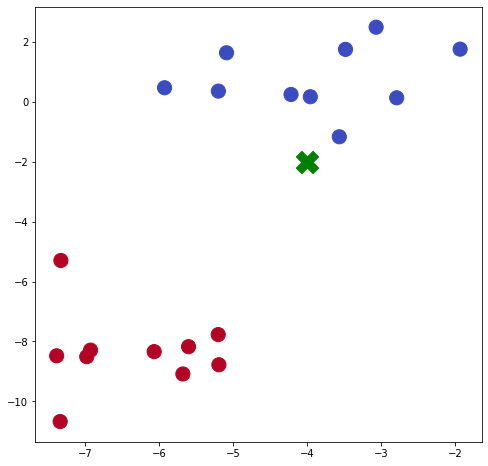

In [4]:
cmap = plt.cm.coolwarm

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)
plt.scatter(-4, -2, s = 500, c='g', marker='X');

Какой объект из обучающей выборки находится наиболее близко к новому? Присваиваем его метку класса новому объекту.

### Пример 2

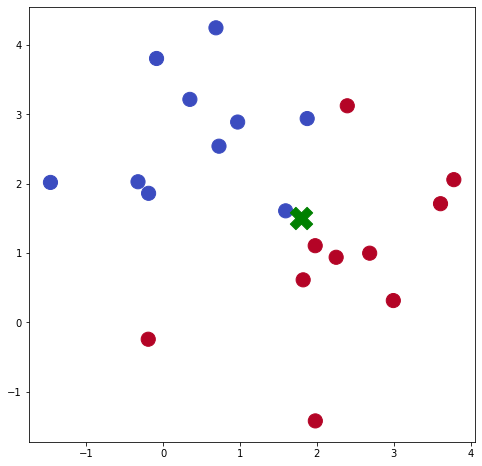

In [5]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2,
                  cluster_std=1, random_state=9, center_box=(0,5))

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='g', marker='X');

Построим классификатор, учитывающий только одного ближайшего соседа. 

Возьмём равномерно много точек плоскости и определим, к какому классу они относятся. 

Так как алгоритм ищет ближайшее расстояние до некоторого объекта из обучающей выборки, все пространство будет разбито на области. Эти области будут контролироваться объектами обучающей выборки, находящимися внутри них. 

Плоскость разделяющая классы объектов будет представлять собой ломанную прямую.

In [6]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y);

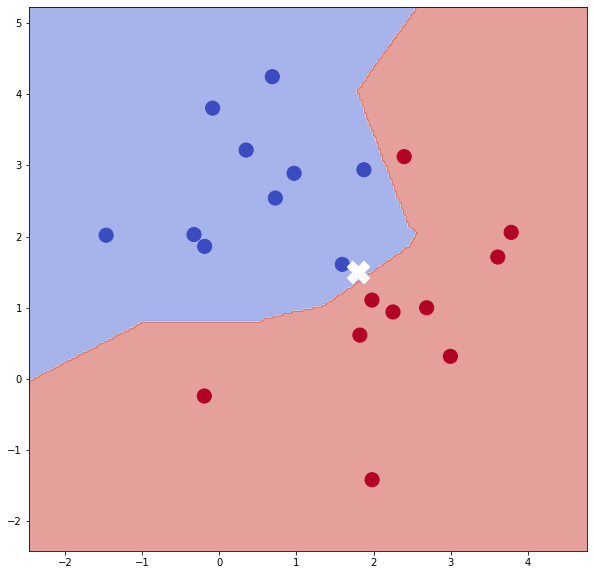

In [7]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='white', marker='X');

### Выбросы (outliers)
Алгоритм очень чувствителен к ошибкам в данных. 

Каждая ошибка в даннных значительно изменяет границу, что очень плохо сказывается на предсказательной способности алгоритма.

Алгоритм сильно переобучен.

Чтобы уменьшить переобучение, можно использовать более одного ближайшего соседа. Принимать решение, например, по трем ближайшим соседям. 

С увеличением числа соседей алгоритм будет становиться более стабильным и иметь более гладкие границы.

In [8]:
x0, x1 = 1.8, 1.5

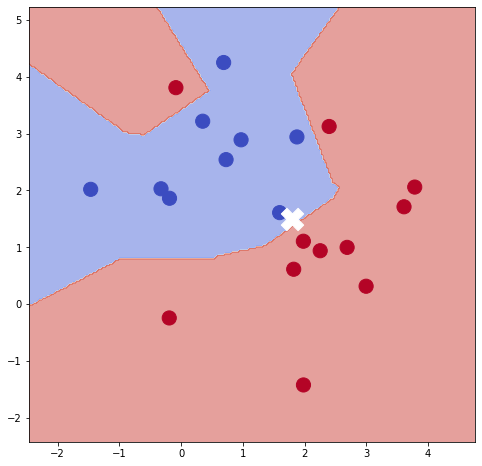

In [9]:
y[-8] = 1
clf.fit(x,y)

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='X');

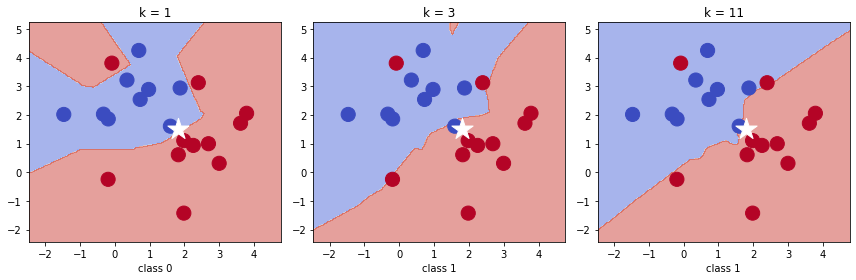

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 1')
plt.xlabel(f'class {c[0]}')

plt.subplot(132)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 3')
plt.xlabel(f'class {c[0]}')

plt.subplot(133)
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 11')
plt.xlabel(f'class {c[0]}')
plt.tight_layout();

### Пример 3
Классификация рукописных цифр

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [12]:
x = digits['data']
y = digits['target']
img = digits['images']

In [13]:
type(x)

numpy.ndarray

#### Представление данных:

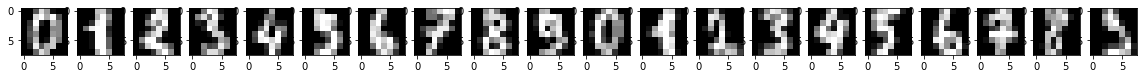

In [14]:
plt.figure(figsize=(20,10))
for it in range(20):
    plt.subplot(1, 20, it+1)
    plt.imshow(img[it], cmap=plt.cm.gray)
    

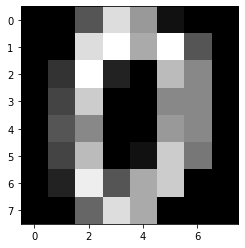

In [15]:
plt.imshow(img[0], cmap=plt.cm.gray);

In [16]:
img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
img[0].min(), img[0].max()

(0.0, 15.0)

Битовая глубина 4 ($2^4 = 16$ цветов)
<img src="Gradient-Bit-Depth.jpg">

#### Распределение классов датасета:

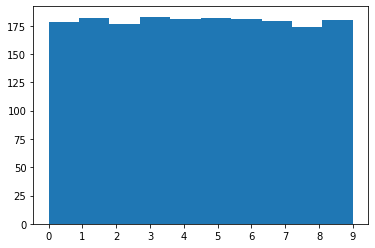

In [18]:
plt.hist(y, bins=10)
plt.xticks(range(0, 10));

#### Разбиение исходных данных на обучающую и контрольную выборки:

In [19]:
x_train, x_test, y_train, y_test, img_train, img_test = train_test_split(x, y, img, 
                                                                         test_size = 0.5, 
                                                                         random_state=17)

#### Распределение классов обучающей выборки:

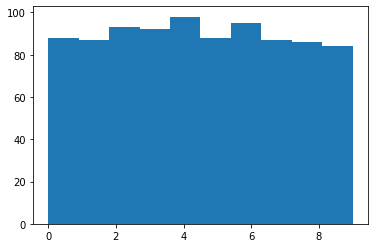

In [20]:
plt.hist(y_train);

## Измерение расстояния (метрики) между объектами

###  Eвклидово расстояние (Euclidean distance)

Для точек ${\displaystyle p=(p_{1},\dots ,p_{n})}$ и ${\displaystyle q=(q_{1},\dots ,q_{n})} $ евклидово расстояние определяется следующим образом: $${\displaystyle d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+\dots +(p_{n}-q_{n})^{2}}}={\sqrt {\sum _{k=1}^{n}(p_{k}-q_{k})^{2}}}}$$

#### Расстояние Евклида для изображений из одного класса:

In [21]:
np.sqrt(np.sum((img[6] - img[6 + 10]) ** 2))

33.80828300875393

#### Расстояние Евклида для изображений из разных классов:

In [22]:
np.sqrt(np.sum((img[6] - img[9]) ** 2))

52.316345438113316

Найдём самые похожие и непохожие цифры

In [23]:
distances = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        distances[i, j] = np.sqrt(np.sum((img[i] - img[j]) ** 2))

In [24]:
import seaborn as sns

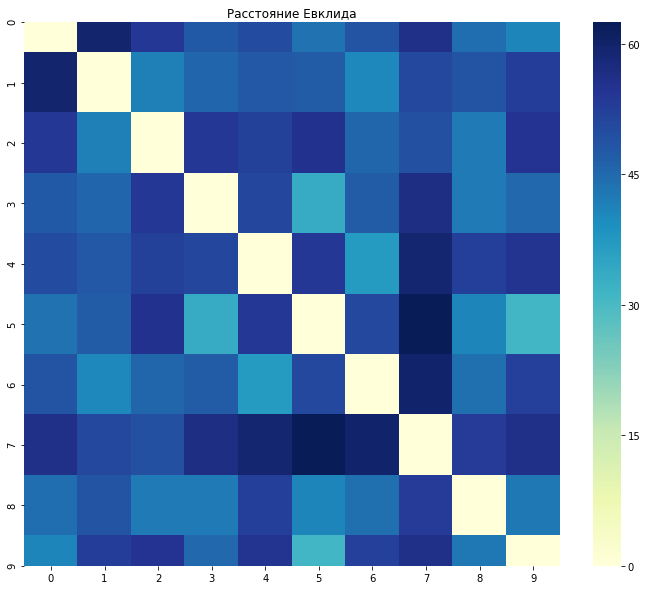

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(distances, cmap="YlGnBu").set_title('Расстояние Евклида');

- Расстояние Евклида "сам с собой" равно 0 (расстояния идентичны)
- Чем меньше расстояние, тем более похожи изображения, тем они ближе в пространстве
- Самые непохожие между собой (далёкие) цифры - 5 и 7
- Самые похожие (разные) цифры - 5 и 9

In [26]:
np.unravel_index(np.argmax(distances, axis=None), distances.shape)

(5, 7)

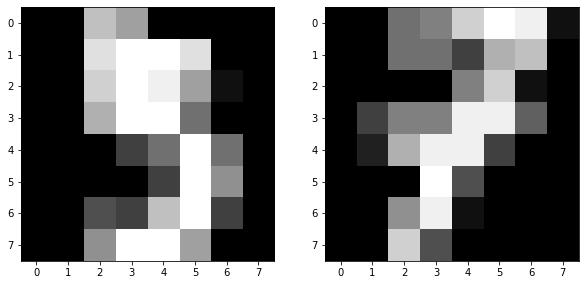

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[5], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[7], cmap=plt.cm.gray);

In [28]:
distances[distances == 0] = 100
np.unravel_index(np.argmin(distances, axis=None), distances.shape)

(5, 9)

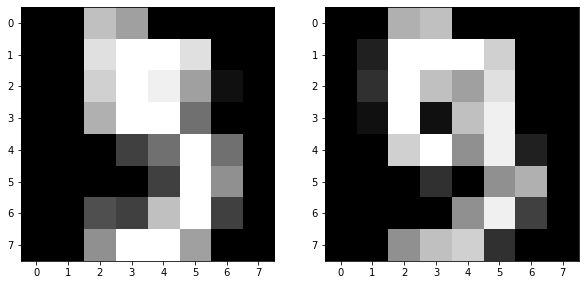

In [29]:
num = 6
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[5], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[9], cmap=plt.cm.gray);

### Другие расстояния
#### Для числовых данных
Два важнейших параметра для алгоритма knn - это количество соседей и мера расстояния между точками данных

В KNeighborsClassifier есть параметр p(power), с помощью которого можно поменять степень в метрике Минковского (Minkowski metric)

**Расстояние Минковского** порядка ${\displaystyle p}$ между двумя точками определяется как:

$${\displaystyle \rho (x,y)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{1/p}} $$

Если ${\displaystyle p=1}$, то получается **манхэттенское расстояние** (метрика **L1**, метрика такси,  taxicab metric, L1 distance, snake distance, city block distance, Manhattan distance)

$${\displaystyle \rho (x,y)= \sum _{i=1}^{n}|x_{i}-y_{i}|}$$

<img src="Manhattan_distance.png">

Красный, желтый и синий пути имеют одинаковое кратчайшее манхэттенское расстояние = 12

Зелёный путь - уникальный, кратчайшее евклидово расстояние ${\displaystyle 6{\sqrt {2}}\approx 8.49}$ 
Измеряем не по прямой, как в евклидовом расстоянии, а параллельно осям координат

Манхэттенское расстояние чаще используется для многомерных данных (curse of dimensionality, проклятие размерности). Если зафиксировать количество объектов в наборе данных (например, 1000), и увеличивать число признаков, то сначала качество решения задачи будет улучшаться, но начиная с некоторого момента (эмпирически 1000/5=200), когда количество признаков вырастет до, примерно, 200, качество начнёт падать. 

Манхэттенское расстояние можно использовать на данных с выбросами


Если ${\displaystyle p=2}$, то получается **евклидово расстояние**: 
$${\displaystyle \rho (x,y)={\sqrt {\sum _{k=1}^{n}(p_{k}-q_{k})^{2}}}}$$
- не подходит для данных с выбросами (разность возводится в квадрат, получается большое число)

#### Для категориальных данных
Если признаки категориальные, то можно использовать **расстояние Хемминга**

Не числа, не можем сравнивать. Можно только сравнить на равенство.

$$\displaystyle \rho (x,y) = {\sum _{k=1}^{n}{x_k \neq y_k}}$$

Единица там, где атрибуты не совпадают

Есть и другие признаки (текст, изображения, временные ряды). Для них существуют другие метрики

## Применение алгоритма k ближайших соседей:
- Дано: новый объект *x*, необходимо узнать его класс
- Сортируем объекты обучающей выборки по расстоянию (например, евклидово расстояние) до нового объекта
- Выбираем k ближайших объектов
- Выдаем наиболее популярный среди них класс

## KNeighborsClassifier
Применим классификатор и посмотрим на долю правильных ответов. 

In [30]:
clf = KNeighborsClassifier(n_neighbors=7, weights ='distance', p=2)
clf.fit(x_train, y_train)
print(f'Mean accuracy (train): {clf.score(x_train, y_train):.2f}') # алгоритм запомнил данные
print(f'Mean accuracy (test) : {clf.score(x_test, y_test):.2f}')

Mean accuracy (train): 1.00
Mean accuracy (test) : 0.97


Посмотрим на ближайших соседей

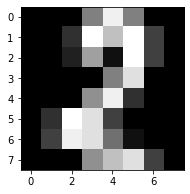

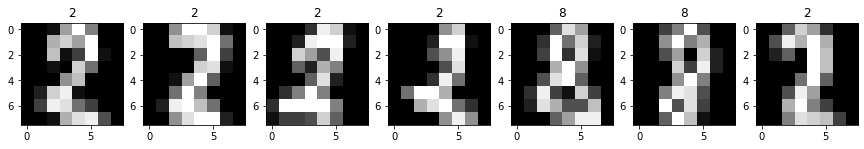

In [31]:
ind = 1
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)

plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)

plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
    plt.title(y_train[nums[0, it]])

5 соседей из 7 - двойки, 2 соседа восьмёрки

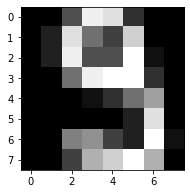

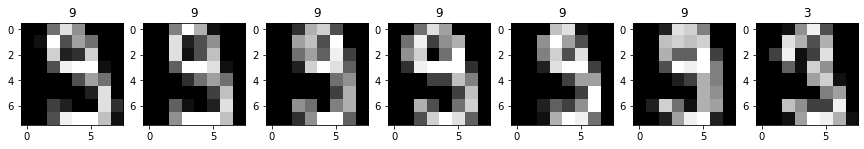

In [32]:
ind = 7
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)
plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)
plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
    plt.title(y_train[nums[0, it]])
#print(y_train[nums[0]])

# Измерение ошибки модели классификации
- Как срвнивать модели? Какая лучше?
- Как выбрать параметр k и метрику?


## Функция потерь (loss function) в классификации
Показывает, насколько сильно ошибается модель на конкретном примере.

- доля верных ответов (accuracy), не точность(precision)
| predicted | gt |
| --- | --- |
|0|0|
|1|1|
|0|0|
|**1**|0|
|1|1|
- 4 правильных ответа из 5, доля верных ответов (accuracy) = 0.8
- не подходит, если классы несбалансированны. Например, в задаче выявления редкого заболевания может быть 950 здоровых пациентов и 50 больных. Если "модель" просто называет всех пациентов здоровыми, то её точность 0.95



### Выбор гиперпараметров 
#### Количество соседей

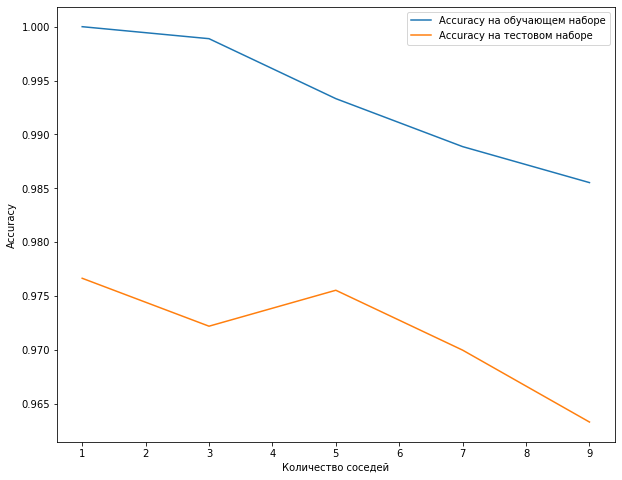

In [33]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11, 2)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)

    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    

plt.figure(figsize=(10,8))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Accuracy на тестовом наборе")
plt.ylabel("Accuracy")
plt.xlabel("Количество соседей")
plt.legend();

Гиперпараметры нельзя выбирать по обучающей выборке. Accuracy для 1 соседа на обучающем наборе = 1 (запоминание данных).

Наибольшая Accuracy (для данного набора данных) достигается при 1 или 5 соседях

Нужно "скрыть" от модели часть данных, не использовать их в обучении

**Обучающая выборка** (train) используется для построения модели

**Валидационная выборка** используется для подбора гиперпараметров модели

**Тестовая выборка** - финальная оценка качества модели

Если модель показывает хорошее качество на обучающей выборке, но плохое на тестовой, то она переобучилась (overfitting)

Обычно соотношение train/test 70/30 или 80/20

#### Кросс-валидация (cross-validation)
надежнее, медленно

Обычно n=3, n=5, n=10

+leave-one-out 

<img src='cv.png'>

Выборка делится на 5 частей. Происходит 5 итераций, на каждой из которых одна часть данных становится тестовой выборкой, а остальные - обучающей. В итоге получается 5 значений метрики для 5 итераций. Они усредняются и получается точная оценка качества алгоритма. 

## Недостатки knn и модификации алгоритма
- не учитывается близость объектов
- синих точек много, но они далеко, оранжевых точек мало, но они очень близко
- если k=3, то будет оранжевый класс
- если k=7, то будет синий класс

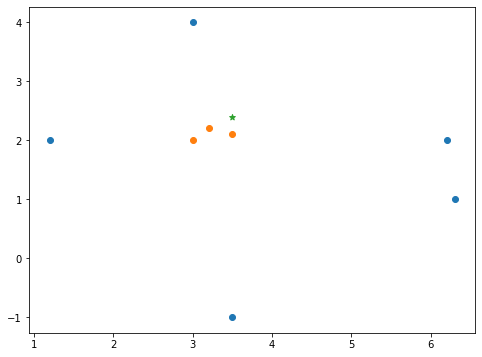

In [34]:
plt.figure(figsize=(8,6))
plt.scatter([3.5, 1.2, 3, 6.2, 6.3], [-1, 2, 4, 2, 1])
plt.scatter([3, 3.5, 3.2], [2, 2.1, 2.2])
plt.scatter(3.5,2.4, marker='*');

### Взвешенный knn
- те объекты, которые ближе, учитываются с большим весом
- далёкие объекты вносят меньший вклад (но учитываются)

#### Парзеновское окно
$$\displaystyle w_i = K(\frac{\rho (x,x_{(i)})}{h})$$
$K$ - ядро
$h$ - ширина окна, с какого расстояния практически перестаём учитывать объекты
- Можно использовать гауссовское ядро (шляпа)
- В sklearn.neighborsClassifier есть параметр weights. Если uniform, то веса равны 1, если distance, то обратно пропорциональны расстоянию 

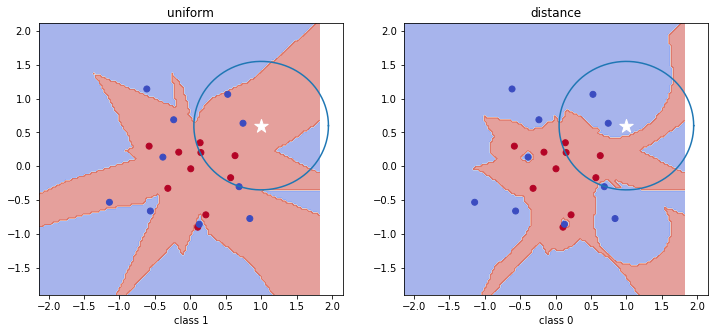

In [35]:
x0, x1 = 1, 0.6
x, y = make_circles(noise=0.3, factor=0.4, random_state=1, n_samples=20)
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

theta = np.linspace(0, 2 * np.pi, 100)

radius = 0.95

a = radius * np.cos(theta) + 1
b = radius * np.sin(theta) + 0.6



plt.figure(figsize=(12, 5))

plt.subplot(121)
clf = KNeighborsClassifier(n_neighbors=7, weights='uniform')
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], c = y, cmap=cmap)
plt.scatter(x0, x1, c='white', marker='*', s=200)
plt.plot(a,b)
c = clf.predict([[x0, x1]])
plt.title('uniform')
plt.xlabel(f'class {c[0]}')

plt.subplot(122)
clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], c = y, cmap=cmap)
plt.scatter(x0, x1, c='white', marker='*', s=200)
#plt.ylim((-2,2))

plt.plot(a,b)

c = clf.predict([[x0, x1]])
plt.title('distance')
plt.xlabel(f'class {c[0]}');




- В первом случае, когда веса не учитываются, в область попало 4 красных соседа и 3 синих, поэтому получился красный класс
- Во втором случае, когда веса учитываются, получается синий класс, так как ближе всего находится синий объект, а все остальные - далеко

# 2. Метод k ближайших соседей для регрессии

- Ответ - не класс, а любое вещественное число


- Рассчитывается расстояние между объектами
- Объекты сортируются по расстоянию
- Выбирается k ближайших объектов
- Ответ - среднее значение

$$\hat{y} = f(x) = \frac{1}{k}\sum \limits_{j=1}^{k} y_j$$

- Тоже можно добавить веса, чтобы ближайшие точки оказывали наибольшее влияние на ответ (формула Надарая-Ватсона)
- Парзеновское окно $$\displaystyle w_i = K(\frac{\rho (x,x_{(i)})}{h})$$
- $K$ - ядро
- $h$ - ширина окна, с какого расстояния практически перестаём учитывать объекты
$$a(x) = \frac{\sum \limits_{i=1}^{k}w_{i}y_{(i)}}{\sum \limits_{i=1}^{k}w_{i}}$$
- использование весов может давать плохой результат при наличии выбросов

## Пример 1

In [36]:
from sklearn.datasets import load_boston
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
#df = pd.DataFrame(data=data['data'])
#sns.pairplot(df);

In [38]:
X, y = data['data'], data['target']

In [39]:
print("Размер матрицы объектов: ", X.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (506, 13)
Рaзмер вектора y:  (506,)


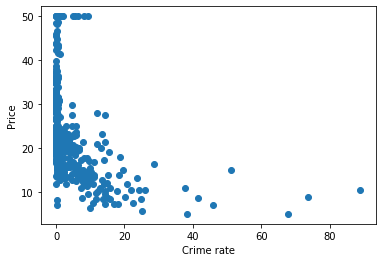

In [40]:
plt.scatter(X[:, 0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price');

Дорогие квартиры находятся в районах с низкий уровнем преступности

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [42]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [43]:
knn.fit(X_train, y_train);

In [44]:
predictions = knn.predict(X_test)

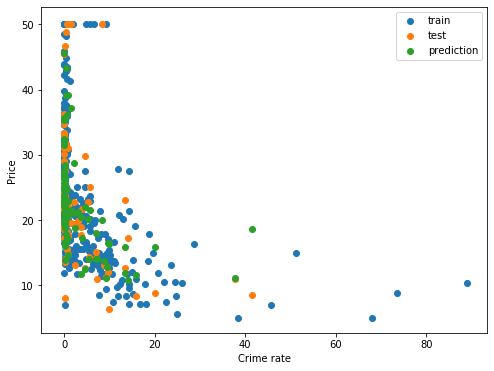

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], y_train, label='train')
plt.scatter(X_test[:, 0], y_test, label='test')
plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.legend();

## Функция потерь для регрессии
- Квадратичная функция потерь
$$L(y,a) = (a-y)^2$$
- $y$ - истинный ответ, $a$ - ответ модели
- Если её использовать для подсчета средней ошибки, то это - **среднеквадратичная ошибка** (Mean Squared Error, **MSE**)
$$Q(a, x) = \frac{1}{l} \sum \limits_{i=1}^{l}(a(x_i)-y_i)^2$$
- чувствительна к выбросам



- **Средняя абсолютная ошибка** (mean absolute error, **MAE**)
$$Q(a, x) = \frac{1}{l} \sum \limits_{i=1}^{l}|a(x_i)-y_i|$$
- слабее штраф за большие отклонения от правильного ответа
- например, если отклонение = 100, то модуль равен 100, а квадрат 10000

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
mean_squared_error(y_test, predictions)

42.197392156862755

In [48]:
mean_absolute_error(y_test, predictions)

4.23156862745098

### GridSearchCV
- Найдём наилучшие параметры, максимизирующие метрику качества. 
- Используем поиск по сетке гиперпараметров. 
- Перебор по всем комбинациям, подсчет метрики для каждого случая, выбор наилучшей комбинации.

In [49]:
from sklearn.model_selection import GridSearchCV
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': [1, 5, 10, 20],
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5, verbose=3, scoring='neg_mean_squared_error', 
                             n_jobs=-1)

Вопрос: Сколько раз будет запущен алгоритм?

Параметр cv = 5 означает, что во время кросс-валидации используется 5 фолдов

In [50]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

In [51]:
grid_searcher.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.7s finished
/home/euloo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Наименьшая ошибка получилась при 5 соседях, манхэттенской метрике и весах обратно пропорциональных расстоянию до точки

In [53]:
best_predictions = grid_searcher.predict(X_test)

In [54]:
mean_squared_error(y_test, best_predictions)

37.35360213557351

MSE стал меньше 🎉

### Как на качество влияет количество соседей
Переберём больше вариантов

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
MSE = []
MAE = []
for n in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    MSE.append(mean_squared_error(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    #scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    #metrics.append(np.mean(scores))

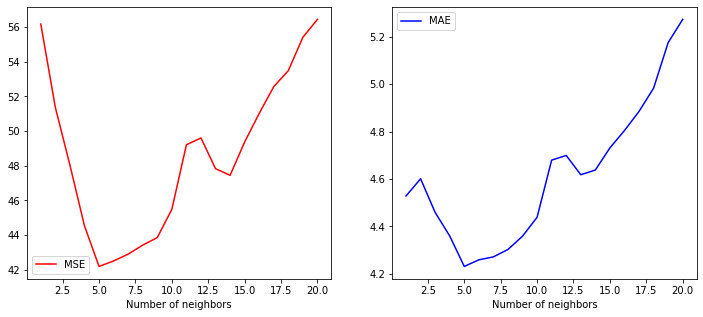

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(range(1, 21), MSE, label = 'MSE', c='r')
plt.xlabel('Number of neighbors')
plt.legend()

plt.subplot(122)
plt.plot(range(1, 21), MAE, label = 'MAE', c='b')
plt.xlabel('Number of neighbors')
plt.legend();

## Пример 2

In [58]:
np.random.seed(42)
x_real = np.linspace(start=-5, stop=10, num=100)
y_real = 100 * np.sin(x_real) + 5* x_real ** 2 + 2 * x_real

x_train = np.linspace(start=-5, stop=10, num=7)
y_train = 100 * np.sin(x_train) + 5*x_train ** 2 + 2 * x_train + 0.5 * np.random.normal(size=x_train.size)

x_test = np.linspace(start=-4.5, stop=9, num=7)
y_test = 100 * np.sin(x_test) +   5*x_test ** 2 + 2 * x_test + 0.5 * np.random.normal(size=x_test.size)

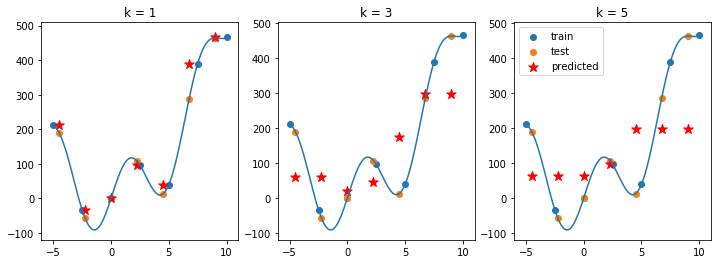

In [59]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(x_real, y_real)

plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')

clf = KNeighborsRegressor(n_neighbors=1, weights='uniform')
clf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r')
plt.title('k = 1')

plt.subplot(132)
plt.plot(x_real, y_real)

plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
clf.n_neighbors = 3
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r')
plt.title('k = 3')

plt.subplot(133)
plt.plot(x_real, y_real)

plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
clf.n_neighbors = 5
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r', label='predicted')
plt.title('k = 5')
plt.legend();

- Если k = 1, то просто копируется ближайшее значение
- Если k = 5, то берется слишком много точек и график "усредняется", теряется амплитуда
- Необходимо использовать метрики, чтобы подобрать правильное значение параметра k
- Можно использовать взвешенный knn

## Достоинства алгоритма knn
- очень простое обучение (запоминание обучающей выборки)
- мало гиперпараметров (k, метрика, окно)
- гипотеза компактности хорошо работает на многих задачах (где значение целевой переменной мало изменяется между близкими объектами)
- гладкая граница разделяющая классы
- предположение о классе строится только на функции расстояния
- легко обновлять классификатор простым добавлением данных


## Недостатки алгоритма knn
1. Чувствителен к выбросам
2. Отсутствующие атрибуты в данных необходимо заполнять, с пропущенными данными невозможно посчитать расстояние
3. Чувствителен к большим значениям атрибутов
4. Высокие вычислительные затраты:
    - Необходимо хранить все данные.
    - Время классификации. Необходимо рассчитывать расстояние до всех объектов $O(nd)$
    Соответственно с ростом n классификатор становится медленнее.
    - Вычисление на классификации, а не на построении классификации.
5. Равное количество соседей с одинаковыми метками не позволяет точно провести классификацию. Приходится использовать нечетное количество соседей, но это может не сработать в мультиклассовой классификации.
- решение проблем:
    - взять класс для тестового случая наугад;
    - воспользоваться 1-nn;
    - давать класс по приоритету.

6. Поиск k ближайших соседей очень долгий. Алгоритм быстро учится, но долго делает предсказание.
- Сложность построения $O(1)$
- Сложность предсказания $O(nd)$

Способы ускорить алгоритм:
- Уменьшение d: уменьшение признакового пространства:

- Уменьшение n: сравнение не со всеми объектами тренировочной выборки:
    - взять некоторое количество $m$ объектов, которое во много раз меньше $n$. $-> O(md)$
    - KD деревья: с меньшим количеством данных, для действительные значения. $-> O(d \log n)$, когда $d << n$
    - inverted list для категориальных признаков:
    - fingerprinting.
   